In [57]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt

In [58]:
# Read in data
df = pd.read_excel("Cleaned June 2020 Prison Stock Pop.xls")

In [59]:
# Clean data
df["Custody Date"] = pd.to_datetime(df["Custody Date"], format="%Y-%m-%d") #Custody Date is the start of an inmate's sentence
df["Date of Birth"] = pd.to_datetime(df["Date of Birth"], format="%Y-%m-%d")
df['Sentence Years'].replace(to_replace = 'LIFE', value = '1000', inplace=True)
df.drop(df[df['Sentence Years'] == 'SDP'].index, inplace = True) 
df['Sentence Years'] = pd.to_numeric(df['Sentence Years'])

In [60]:
df

,IDOC #,Name,Date of Birth,Sex,Race,Veteran Status,Current Admission Date,Admission Type,Parent Institution,Projected Mandatory Supervised Release (MSR) Date,Projected Discharge Date,Custody Date,Sentence Date,Crime Class,Holding Offense,Sentence Years,Sentence Months,Truth in Sentencing,Sentencing County
0,A00147,"MCCUTCHEON, JOHN",1949-06-14,Male,White,Yes,1983-02-16,Discharged & recommitted,Dixon,2033-10-06 00:00:00,2036-10-06 00:00:00,1982-11-26,1983-02-15,Class X,ATTEMPT MURDER/INTENT TO KILL/INJURE,50,00,Day-for-Day,Jasper
1,A01054,"TIPTON, DARNELL",1954-03-25,Male,Black,No,1988-12-23,"Parole violator, New sentence",Western Illinois,2065-08-14 00:00:00,2068-08-14 00:00:00,1986-09-29,1987-08-07,Class X,AGG CRIM SEX ASSAULT/WEAPON,60,00,Day-for-Day,Cook
2,A01072,"BRISBON, HENRY",1956-01-12,Male,Black,No,1974-02-22,Direct from court,Pontiac,NaN,NaN,1982-02-24,1982-02-24,Murder,MURDER/INTENT TO KILL/INJURE,1000,,Day-for-Day,Will
3,A01077,"JONES, ROBERT",1953-04-03,Male,Black,No,1983-09-16,"MSR violator, New sentence",Pinckneyville,NaN,NaN,1982-04-13,1983-09-15,Murder,MURDER/INTENT TO KILL/INJURE,1000,,Day-for-Day,Cook
4,A01148,"BROWN, RONALD",1955-02-02,Male,Black,No,2005-12-13,Discharged & recommitted,Western Illinois,NaN,NaN,1998-10-03,2005-12-09,Murder,MURDER/INTENT TO KILL/INJURE,1000,,Day-for-Day,Cook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32043,Y42081,"LEISGANG, ANDREA S.",1982-03-01,Female,White,Unknown,2020-03-26,Direct from court,Logan,2082-08-20 00:00:00,NaN,2018-11-20,2020-03-20,Class X,PRED CRIM SEX ASSLAUT/VICTIM <13,60,00,85%,Madison
32044,Y42082,"KECK, BRANDY J.",1978-07-23,Female,White,Unknown,2020-03-26,Direct from court,Logan,2020-07-24 00:00:00,2021-07-24 00:00:00,2020-01-24,2020-03-23,Class 4,POSS AMT CON SUB EXCEPT(A)/(D),1,00,Day-for-Day,Madison
32045,Y42083,"NELLIGAN, JOHN J.",1988-08-31,Male,White,Unknown,2020-03-26,Direct from court,Graham,2021-02-20 00:00:00,2022-02-20 00:00:00,2020-02-20,2020-03-19,Class 4,POSS AMT CON SUB EXCEPT(A)/(D),3,00,Day-for-Day,Jefferson
32046,Y42173,"GONZALEZ, RENE",1973-06-13,Male,Hispanic,Unknown,2020-06-18,Technical MSR violator,Stateville,2020-05-11 00:00:00,2022-05-11 00:00:00,2018-09-10,2020-04-22,Class 2,AGG CRIM SEX ABUSE/VICTIM <13,3,00,Day-for-Day,Cook


In [61]:
# VARIABLES TO BE USED IN MULTIPLE CALCULATIONS

# Costs
costOfAnInmate = 34135
costOfAnInmateOverSixty = 68270
costOfPersonOnParole = 2100

# EDR Hearings per month limit
maxHearingsPerMonth2022 = 500

# Grant rates
conservativeGrantRate = .197
semiconservativeGrantRate = .356
liberalGrantRate = .465

# Inmates qualified for EDR prior to January 1st, 2022
before2022 = pd.to_datetime(str(2022 - 20) + "-01-01")
qualifiedBefore2022 = len(df.loc[(df["Custody Date"] < before2022)])

In [62]:
# Helper function for plotting
def autolabel(rects, plt):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = plt.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')
# autolabel(rects1, ax)
# autolabel(rects2, ax)

# Statistics for Inmates Granted EDR in 2022
### Number of Inmates Released by End of 2022, and Savings from Doing So

In [63]:
#Calculate the number of inmates who will have served 20 years of their sentence by 2022
twentyYearsServedDate = pd.to_datetime(str(2022 - 20) + "-12-31")

numReleased = len(df.loc[df["Custody Date"] <= twentyYearsServedDate])

#Savings from the reduction in inmate population
savings = (numReleased * (costOfAnInmate - costOfPersonOnParole))
print(numReleased)
print(savings)

4311
138102885


The statistics below have been calculated assuming all inmates who have served 20, or more years of their sentence by the end of 2022, will be granted Earned Discretionary Release(EDR) <br>

- Number of inmates granted EDR with a 100% grant rate: 4408
- Savings to the state of Illinois due to the inmate population reduction: $141,210,280
<br>

The number of inmates granted EDR by December 31st, 2022 includes inmates who served 20 years or more of their sentence prior to January 1st, 2022.

### How Calculations were Made
- I pulled out all inmates who started their sentences on December 31st, 2002 or earlier from the whole data set. The size of this subset is the number of people who will be granted EDR in 2022
- The cost per incarcerated person per year is \\$34,135, and the cost of a person who is on parole is \\$2,100. To calculate the total savings, the number of inmates who will be released by the end of 2022 was multiplied by \\$34,135, and from that, the total cost of parolees is subtracted.

### Plot number of Inmates Granted Parole per Month With 100% Grant Rate

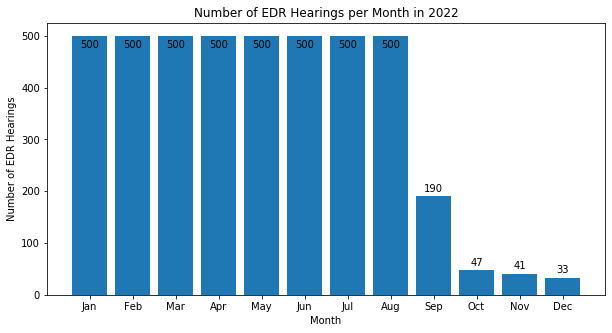

In [64]:
monthlyNumReleased = []
spillOver = qualifiedBefore2022
#Store data that will be plotted
for month in range(1, 13):
    startOfMonth = pd.to_datetime(str(2022 - 20) + "-"+ str(month) + "-01")
    endOfMonth = pd.to_datetime(str(2022 - 20) + "-"+ str(month)) + MonthEnd(0)
    
    numQualifiedDuringMonth = len(df.loc[(df["Custody Date"] >= startOfMonth) & (df["Custody Date"] <= endOfMonth)])
    numReleased = numQualifiedDuringMonth + spillOver
    
    #Account for limits to number of hearings per month
    if(numReleased >= maxHearingsPerMonth2022):
        monthlyNumReleased.append(maxHearingsPerMonth2022)
        spillOver = spillOver - (maxHearingsPerMonth2022 - numQualifiedDuringMonth)
    elif(numReleased >= 0):
        monthlyNumReleased.append(numReleased)
        spillOver = 0
    else:
        monthlyNumReleased.append(numReleased)
        
# Plot EDR hearing data
plot = plt.figure(figsize=(10,5))
ax = plot.add_subplot(1,1,1)
rects = ax.bar(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], monthlyNumReleased)
plt.title("Number of EDR Hearings per Month in 2022")
plt.xlabel("Month")
plt.ylabel("Number of EDR Hearings")
autolabel(rects, ax)
plt.show()

### How Calculations were Made
- The maximum number of EDR hearings per month is 500 hearings. There were 3908 inmates who qualified for EDR prior to Januart 1st, 2022. Inmates who served exactly 20 years of their sentence in a given month were given an EDR hearing that month. The remaining number of inmates a committee can see, up to 500, is filled by inmates who served 20 years, or more of their sentences prior to January 1st, 2022. Remaining inmates are rolled over to the next month.

# Statistics for Number of Inmates 60, or Older to be Released in 2022

In [97]:
def calcNumInmatesOfAgeInRange(startYear, endYear, age, grantRate):
    population = df.copy()
    numEDRDenials = dict()
    numEDRHearings = []
    
    for year in range(startYear, endYear + 1):
        #Get sub-dictionary of inmates who are 'age' or older
        birthdateCutoff = pd.to_datetime(str(year - age) + "-12-31")
        dfAgeAndOlder = population.loc[(population["Date of Birth"] <= birthdateCutoff)]
        
        #Get number of inmates who are 'age' or older, AND have served 20 years or more of their sentence
        twentyYearsServedDate = pd.to_datetime(str(year - 20) + "-12-31")
        servedTwentyYears = dfAgeAndOlder.loc[population["Custody Date"] <= twentyYearsServedDate]
        numOverAgeReleased = len(servedTwentyYears)
        
        if(year == startYear or year == startYear + 1):
            #Add total number of EDR hearings for this year
            numEDRHearings.append(numOverAgeReleased)

            #Add total number of EDR denials for current year including reapplications every 2 years
            numEDRDenials[year] = (numOverAgeReleased) * (1 - grantRate)
            
            #Drop released inmates from population
            population = population[~(population["IDOC #"].isin(servedTwentyYears["IDOC #"].head(int(numOverAgeReleased * grantRate))))]
            
        if(year >= (startYear + 2)):
            #Add total number of EDR hearings for this year
            numEDRHearings.append(numOverAgeReleased + numEDRDenials[year - 2])

            #Add total number of EDR denials for current year including reapplications every 2 years
            numEDRDenials[year] = (numOverAgeReleased + numEDRDenials[year - 2]) * (1 - grantRate)
            
            #Drop released inmates from population
            population = population[~(population["IDOC #"].isin(servedTwentyYears["IDOC #"].head(int((numOverAgeReleased + numEDRDenials[year - 2]) * grantRate))))]
    #print(numEDRHearings)
    return (int(sum(numEDRHearings) * grantRate), numEDRHearings, grantRate) #Cast to int truncates

In [98]:
numOverSixty = calcNumInmatesOfAgeInRange(2022, 2022, 60, 1)

print(numOverSixty[0])
print(numOverSixty[0] * (costOfAnInmateOverSixty - costOfPersonOnParole))

1199
79337830


- Number of inmates over 60 and served >= 20 years of their sentence: 1252
- Savings from releasing inmates over 60, served >= 20 years of sentence: $82,844,840

### How Calculations were Made
- I pulled out inmates who were over the age of 60 by December 31st, 2022, and who had served 20 years, or more of their sentence by December 31st, 2022. The size of this subset of inmates is the value for the number of inmates over the age of 60, who qualify for EDR. This assumes a grant rate of 100%.

- The cost per incarcerated person 60 or older per year is \\$68,270. To calculate the total savings from releasing this subset of inmates, the number of inmates 60 or older who will be released by the end of 2022 was multiplied by \\$68,270.

# Statistics for Number of Inmates 60, or Older to be Released in 2022-2027, and 2022-2032

In [99]:
def calcCumulativeCost(tup, startYear, endYear):
    totalCost = 0
    year = endYear - startYear + 1
    #tup[2] is grant rate, tup[1] is number of edr hearings in time range
    numInmatesReleased = [(tup[2] * numEDRHearings) for numEDRHearings in tup[1]]

    for numInmates in numInmatesReleased:
        # (costOfAnInmateOverSixty - costOfPersonOnParole) is yearly savings of a single inmate
        savingsPerYearOfAllReleasedInYear = int(numInmates) * (costOfAnInmateOverSixty - costOfPersonOnParole)
        #Multiply savings per year by number of years left in time range
        totalCost += savingsPerYearOfAllReleasedInYear * year
        year = year - 1
    return (totalCost)



tenYearsConservative = calcNumInmatesOfAgeInRange(2022, 2032, 60, conservativeGrantRate)
calcCumulativeCost(tenYearsConservative, 2022, 2032)

1634994530

In [100]:
fiveYearsConservative = calcNumInmatesOfAgeInRange(2022, 2027, 60, conservativeGrantRate)
tenYearsConservative = calcNumInmatesOfAgeInRange(2022, 2032, 60, conservativeGrantRate)
fiveYearsConservativeCost = calcCumulativeCost(fiveYearsConservative, 2022, 2027)
tenYearsConservativeCost = calcCumulativeCost(tenYearsConservative, 2022, 2032)
print("Number of inmates 60 or older to be released in 2022-2027 with conservative grant rate: ", fiveYearsConservative[0])
print("Savings from releasing inmates 60 or older in 2022-2027 with conservative grant rate: ", fiveYearsConservativeCost)
print("Number of inmates 60 or older to be released in 2022-2032 with conservative grant rate: ", tenYearsConservative[0])
print("Savings from releasing inmates 60 or older in 2022-2032 with conservative grant rate: ", tenYearsConservativeCost)
print('\n')

fiveYearsMedium = calcNumInmatesOfAgeInRange(2022, 2027, 60, semiconservativeGrantRate)
tenYearsMedium = calcNumInmatesOfAgeInRange(2022, 2032, 60, semiconservativeGrantRate)
fiveYearsMediumCost = calcCumulativeCost(fiveYearsMedium, 2022, 2027)
tenYearsMediumCost = calcCumulativeCost(tenYearsMedium, 2022, 2032)
print("Number of inmates 60 or older to be released in 2022-2027 with semi-conservative grant rate: ", fiveYearsMedium[0])
print("Savings from releasing inmates 60 or older in 2022-2027 with semi-conservative grant rate: ", fiveYearsMediumCost)
print("Number of inmates 60 or older to be released in 2022-2032 with semi-conservative grant rate: ", tenYearsMedium[0])
print("Savings from releasing inmates 60 or older in 2022-2032 with semi-conservative grant rate: ", tenYearsMediumCost)
print('\n')

fiveYearsLiberal = calcNumInmatesOfAgeInRange(2022, 2027, 60, liberalGrantRate)
tenYearsLiberal = calcNumInmatesOfAgeInRange(2022, 2032, 60, liberalGrantRate)
fiveYearsLiberalCost = calcCumulativeCost(fiveYearsLiberal, 2022, 2027)
tenYearsLiberalCost = calcCumulativeCost(tenYearsLiberal, 2022, 2032)
print("Number of inmates 60 or older to be released in 2022-2027 with liberal grant rate: ", fiveYearsLiberal[0])
print("Savings from releasing inmates 60 or older in 2022-2027 with liberal grant rate: ", fiveYearsLiberalCost)
print("Number of inmates 60 or older to be released in 2022-2032 with liberal grant rate: ", tenYearsLiberal[0])
print("Savings from releasing inmates 60 or older in 2022-2032 with liberal grant rate: ", tenYearsLiberalCost)

Number of inmates 60 or older to be released in 2022-2027 with conservative grant rate:  2169
Savings from releasing inmates 60 or older in 2022-2027 with conservative grant rate:  444794740
Number of inmates 60 or older to be released in 2022-2032 with conservative grant rate:  4561
Savings from releasing inmates 60 or older in 2022-2032 with conservative grant rate:  1634994530


Number of inmates 60 or older to be released in 2022-2027 with semi-conservative grant rate:  2589
Savings from releasing inmates 60 or older in 2022-2027 with semi-conservative grant rate:  600095730
Number of inmates 60 or older to be released in 2022-2032 with semi-conservative grant rate:  4743
Savings from releasing inmates 60 or older in 2022-2032 with semi-conservative grant rate:  1871221430


Number of inmates 60 or older to be released in 2022-2027 with liberal grant rate:  2652
Savings from releasing inmates 60 or older in 2022-2027 with liberal grant rate:  654619810
Number of inmates 60 or older

[1199, 1151, 2093.797, 1870.253, 2536.318991, 2162.813159]


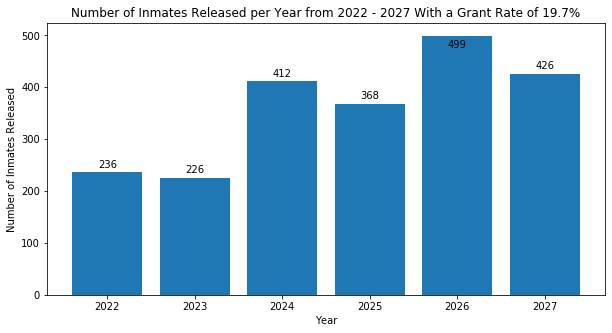

[1199, 1151, 2093.797, 1870.253, 2536.318991, 2162.813159, 2609.6641497729997, 2155.7389666769996, 2542.5603122677185, 2212.0583902416306, 2621.675930750978]


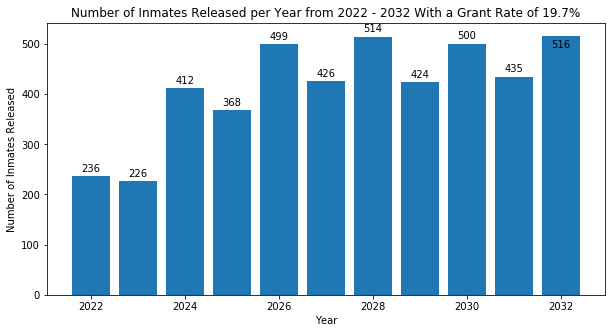

[1199, 961, 1597.156, 1102.884, 1397.568464, 1015.257296]


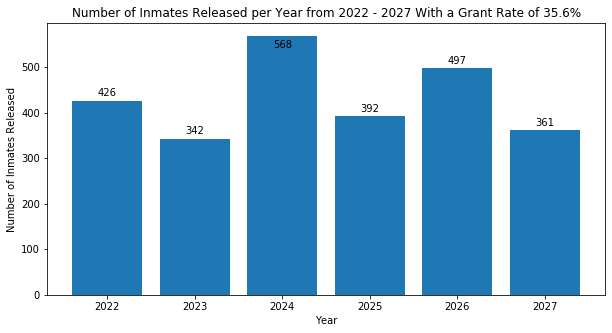

[1199, 961, 1597.156, 1102.884, 1397.568464, 1015.257296, 1238.0340908160001, 1013.825698624, 1244.293954485504, 1138.903749913856, 1416.3253066886646]


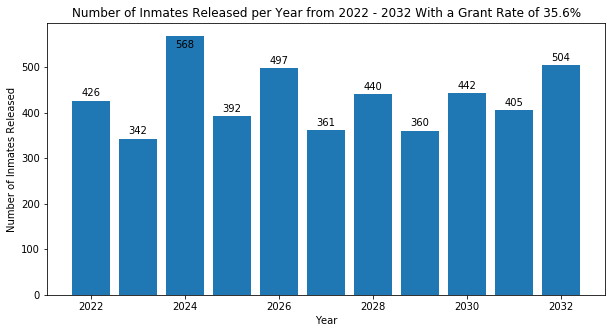

[1199, 830, 1292.465, 722.05, 968.4687749999998, 691.29675]


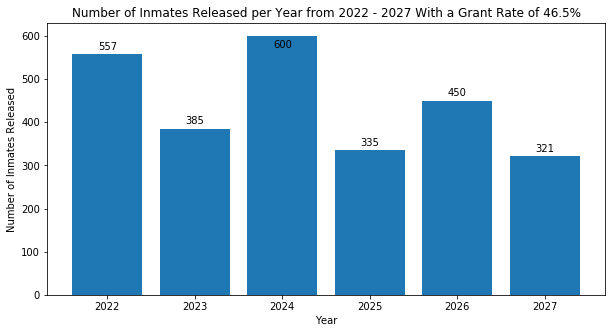

[1199, 830, 1292.465, 722.05, 968.4687749999998, 691.29675, 856.1307946249998, 729.84376125, 926.0299751243748, 909.46641226875, 1126.4260366915405]


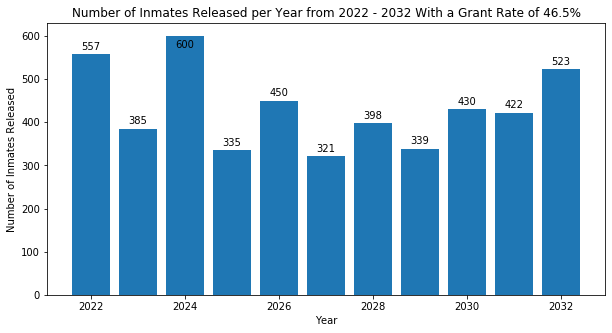

In [101]:
#Plot number of inmates released per year
for yearlyNumReleased in [fiveYearsConservative, tenYearsConservative, fiveYearsMedium,
                          tenYearsMedium, fiveYearsLiberal, tenYearsLiberal]:
    print(yearlyNumReleased[1])
    plot = plt.figure(figsize=(10,5))
    ax = plot.add_subplot(1,1,1)
    rects = plt.bar(range(2022, 2022 + len(yearlyNumReleased[1])), [int(x * yearlyNumReleased[2]) for x in yearlyNumReleased[1]])
    plt.title("Number of Inmates Released per Year from 2022 - " + str(2021 + len(yearlyNumReleased[1]))+
              " With a Grant Rate of " + str(yearlyNumReleased[2] * 100) + "%")
    plt.xlabel("Year")
    plt.ylabel("Number of Inmates Released")
    autolabel(rects, ax)
    plt.show()

### How Calculations were Made
- For the time ranges, 2022-2027 and 2022 - 2032, I pulled out inmates who were over the age of 60 by December 31st per year in the time range, and who had served 20 years, or more of their sentence by December 31st of the same year. The size of this subset of inmates times the grant rates of 19.7%, 35.6%, and 46.5% is the value for the number of inmates over the age of 60, who qualify for EDR in a given year. The sum of this subset per year is the final value.

- The cost per incarcerated person 60 or older per year is \\$68,270. To calculate the total savings, the number of inmates 60 or older who will be released in 2022-2027 or 2022 - 2032, for the following grant rates: 19.7%, 35.6%, or 46.5%, was multiplied by \\$68,270.

# James' work below this cell, Neel's above

## Number of aditional EDR hearings from 2023-2043

Number of additional EDR hearings that would occur from 2023-2043: 31883


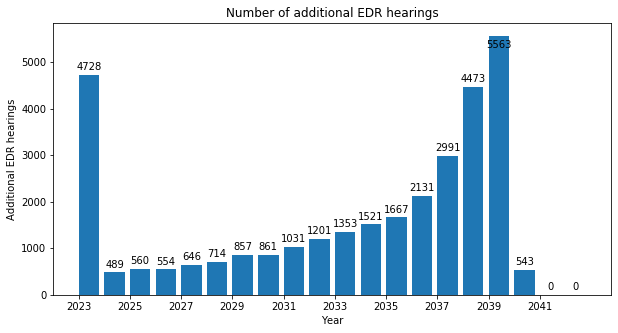

In [71]:
result = calcNumInmatesOfAgeInRange(2023, 2042, 0, 1)[1]
total = calcNumInmatesOfAgeInRange(2023, 2042, 0, 1)[0]
for q in range(len(result)):
    if result[q] > 6000:
        result[q] = 6000
print("Number of additional EDR hearings that would occur from 2023-2043:",total)
plot = plt.figure(figsize=(10,5))
ax = plot.add_subplot(1,1,1)
rects = plt.bar(range(2023,2043),result,align = 'edge')
plt.title("Number of additional EDR hearings")
plt.xlabel("Year")
plt.xticks(range(2023,2043,2))
plt.ylabel("Additional EDR hearings")
autolabel(rects, ax)
plt.show()

### How calculations were made

- This was calculated using Neel's function calcNumInmatesOfAgeInRange. Inputs were 2023,2042, age of zero to capture all inmates, and a grant rate of 1 (this is inconsequential). The exact EDR hearings was returned by the second returned variable 'numEDRHearings'. The number of EDR hearings were capped at the 6000 EDR hearings per year limit.

## Number of inmates over 50 released in 2022, 2022-2027, 2022-2032, based on liberal, moderate, and conservative grant rates; savings for each

In [192]:
fiftiesLib22 = calcNumInmatesOfAgeInRange(2022, 2022, 50, 0.197)
fiftiesMed22 = calcNumInmatesOfAgeInRange(2022, 2022, 50, 0.356)
fiftiesCons22 = calcNumInmatesOfAgeInRange(2022, 2022, 50, 0.465)
print('\033[1m'+"2022 data"+'\033[0m')
print("Number of inmates over 50 to be released in 2022 with liberal EDR rates:", fiftiesLib22[0])
print('\t' * 1,"Amount saved per year where they would otherwise be incarcerated: $" ,(fiftiesLib22[0]*costOfAnInmateOverSixty) - (fiftiesLib22[0]*costOfPersonOnParole))
print("Number of inmates over 50 to be released in 2022 with moderate EDR rates:", fiftiesMed22[0])
print('\t' * 1,"Amount saved per year where they would otherwise be incarcerated: $" ,(fiftiesMed22[0]*costOfAnInmateOverSixty) - (fiftiesMed22[0]*costOfPersonOnParole))
print("Number of inmates over 50 to be released in 2022 with conservative EDR rates:", fiftiesCons22[0])
print('\t' * 1,"Amount saved per year where they would otherwise be incarcerated: $", (fiftiesCons22[0]*costOfAnInmateOverSixty) - (fiftiesCons22[0]*costOfPersonOnParole))
print()
fiftiesLib27 = calcNumInmatesOfAgeInRange(2022, 2027, 50, 0.197)
fiftiesMed27 = calcNumInmatesOfAgeInRange(2022, 2027, 50, 0.356)
fiftiesCons27 = calcNumInmatesOfAgeInRange(2022, 2027, 50, 0.465)
print('\033[1m'+"2022-2027 data"+'\033[0m')
print("Number of inmates over 50 to be released from 2022 - 2027 with liberal EDR rates:", fiftiesLib27[0])
print('\t' * 1,"Amount saved per year where they would otherwise be incarcerated: $" ,(fiftiesLib27[0]*costOfAnInmateOverSixty) - (fiftiesLib27[0]*costOfPersonOnParole))
print("Number of inmates over 50 to be released in 2022 - 2027 with moderate EDR rates:", fiftiesMed27[0])
print('\t' * 1,"Amount saved per year where they would otherwise be incarcerated: $" ,(fiftiesMed27[0]*costOfAnInmateOverSixty) - (fiftiesMed27[0]*costOfPersonOnParole))
print("Number of inmates over 50 to be released in 2022 - 2027 with conservative EDR rates:", fiftiesCons27[0])
print('\t' * 1,"Amount saved per year where they would otherwise be incarcerated: $", (fiftiesCons27[0]*costOfAnInmateOverSixty) - (fiftiesCons27[0]*costOfPersonOnParole))
print()
fiftiesLib32 = calcNumInmatesOfAgeInRange(2022, 2032, 50, 0.197)
fiftiesMed32 = calcNumInmatesOfAgeInRange(2022, 2032, 50, 0.356)
fiftiesCons32 = calcNumInmatesOfAgeInRange(2022, 2032, 50, 0.465)
print('\033[1m'+"2022-2032 data"+'\033[0m')
print("Number of inmates over 50 to be released in 2022 - 2037 with liberal EDR rates:", fiftiesLib32[0])
print('\t' * 1,"Amount saved per year where they would otherwise be incarcerated: $" ,(fiftiesLib32[0]*costOfAnInmateOverSixty) - (fiftiesLib32[0]*costOfPersonOnParole))
print("Number of inmates over 50 to be released in 2022 - 2037 with moderate EDR rates:", fiftiesMed32[0])
print('\t' * 1,"Amount saved per year where they would otherwise be incarcerated: $" ,(fiftiesMed32[0]*costOfAnInmateOverSixty) - (fiftiesMed32[0]*costOfPersonOnParole))
print("Number of inmates over 50 to be released in 2022 - 2037 with conservative EDR rates:", fiftiesCons32[0])
print('\t' * 1,"Amount saved per year where they would otherwise be incarcerated: $", (fiftiesCons32[0]*costOfAnInmateOverSixty) - (fiftiesCons32[0]*costOfPersonOnParole))
print()

2022 data
Number of inmates over 50 to be released in 2022 with liberal EDR rates: 493
	 Amount saved per year where they would otherwise be incarcerated: $ 32621810
Number of inmates over 50 to be released in 2022 with moderate EDR rates: 891
	 Amount saved per year where they would otherwise be incarcerated: $ 58957470
Number of inmates over 50 to be released in 2022 with conservative EDR rates: 1163
	 Amount saved per year where they would otherwise be incarcerated: $ 76955710

2022-2027 data
Number of inmates over 50 to be released from 2022 - 2027 with liberal EDR rates: 4818
	 Amount saved per year where they would otherwise be incarcerated: $ 318807060
Number of inmates over 50 to be released in 2022 - 2027 with moderate EDR rates: 6064
	 Amount saved per year where they would otherwise be incarcerated: $ 401254880
Number of inmates over 50 to be released in 2022 - 2027 with conservative EDR rates: 6207
	 Amount saved per year where they would otherwise be incarcerated: $ 410717

### How calculations were made
- These calculations were found by using Neel's calcNumInmatesOfAgeInRange function with inputs of 2022, 2022-2027, and 2022-2032. Each time frame was broken down into the three different grant rates. The savings were calculated by multiplying the ammount of people released in the period of time multiplied by the per year the cost of incarcerating an inmate over 60 minus the people released multiplied by the per year cost of someone on parole

## Racial Analysis

In [193]:
def calcNumInmatesOfRaceInRange(startYear, endYear, race, grantRate):
    numInmatesDenied = [0,0]
    numEDRHearings = []
    dfCopy = df.copy()
    
    for year in range(startYear, endYear + 1):
        
        dfRace = dfCopy.loc[(dfCopy["Race"] == race)]
        twentyYearsServedDate = pd.to_datetime(str(year - 20) + "-12-31")
        servedTwentyYears = dfRace.loc[dfCopy["Custody Date"] <= twentyYearsServedDate]
        numRaceReleased = len(servedTwentyYears)
        
        
        #Start accounting for inmates reapplying for parole 2 years after startYear
        if(year == startYear): #Initialize array with denied inmates for first 2 years
            numInmatesDenied[0] = numRaceReleased * (1 - grantRate)
            numEDRHearings.append(numRaceReleased)
            dfCopy = dfCopy[~(dfCopy["IDOC #"].isin(servedTwentyYears["IDOC #"].head(int(numRaceReleased * grantRate))))] #Drop inmates who will be released
        elif(year == startYear + 1):
            numInmatesDenied[1] = numRaceReleased * (1 - grantRate)
            numEDRHearings.append(numRaceReleased)
            dfCopy = dfCopy[~(dfCopy["IDOC #"].isin(servedTwentyYears["IDOC #"].head(int(numRaceReleased * grantRate))))] #Drop inmates who will be released
        elif(year >= startYear + 2):
            twoYearsBack = numInmatesDenied[0]
            numEDRHearings.append(numRaceReleased + numInmatesDenied[0])
            numInmatesDenied[0] = numInmatesDenied[1]
            numInmatesDenied[1] = (numRaceReleased + twoYearsBack) * (1 - grantRate)
            dfCopy = dfCopy[~(dfCopy["IDOC #"].isin(servedTwentyYears["IDOC #"].head(int(numRaceReleased * grantRate))))] #Drop inmates who will be released
            
    return (int(sum(numEDRHearings) * grantRate), numEDRHearings, grantRate) #Cast to int truncates

Current racial breakdown of prison population:


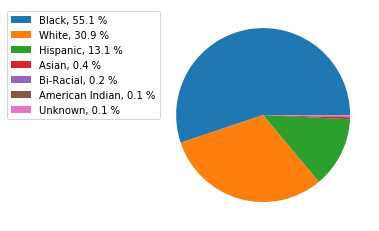

Racial Breakdown of those released in 2022 - 2022 :


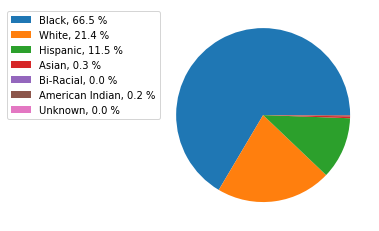

Racial Breakdown prison population by 2022  with a grant rate of 0.465 :


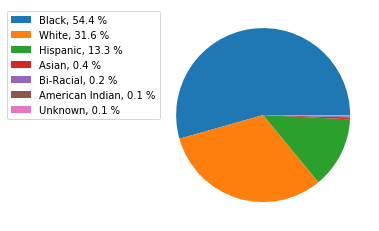

Racial Breakdown prison population by 2022  with a grant rate of 0.356 :


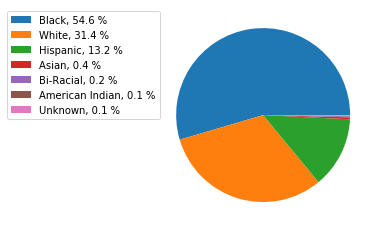

Racial Breakdown prison population by 2022  with a grant rate of 0.197 :


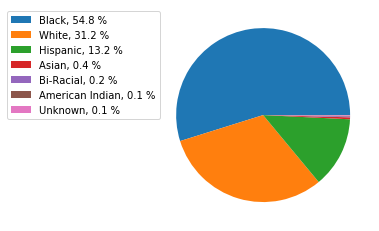

Racial Breakdown of those released in 2022 - 2027 :


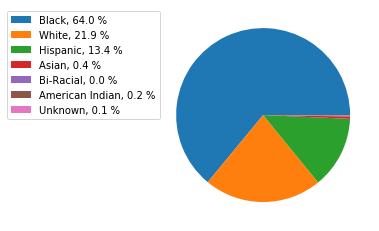

Racial Breakdown prison population by 2027  with a grant rate of 0.465 :


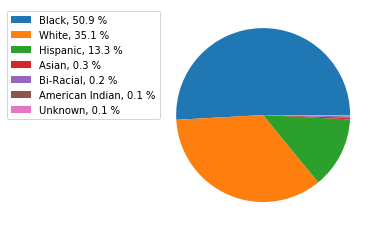

Racial Breakdown prison population by 2027  with a grant rate of 0.356 :


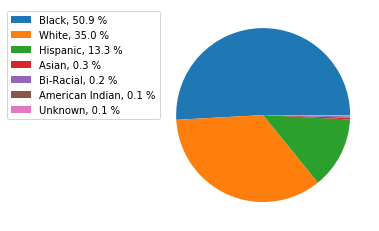

Racial Breakdown prison population by 2027  with a grant rate of 0.197 :


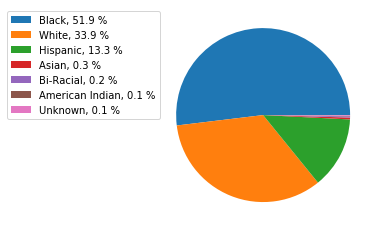

Racial Breakdown of those released in 2022 - 2032 :


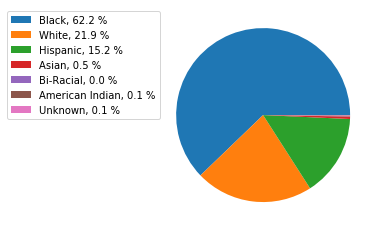

Racial Breakdown prison population by 2032  with a grant rate of 0.465 :


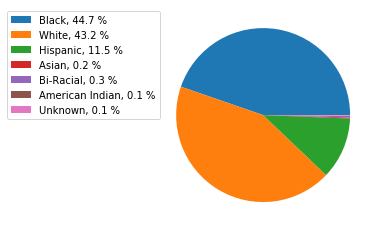

Racial Breakdown prison population by 2032  with a grant rate of 0.356 :


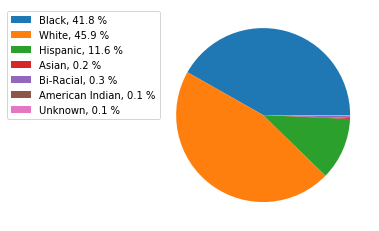

Racial Breakdown prison population by 2032  with a grant rate of 0.197 :


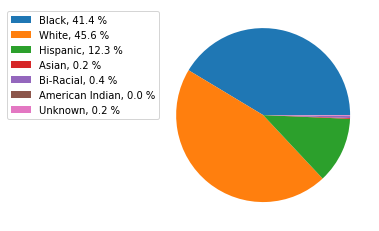

In [194]:
print("Current racial breakdown of prison population:")
labels = ['Black','White','Hispanic','Asian','Bi-Racial','American Indian','Unknown']
sizes = 100*df['Race'].value_counts(normalize=True) 
plt.pie(df['Race'].value_counts())
plt.legend(labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)],loc='upper left',bbox_to_anchor=(-0.7, 1.))
plt.show()
#print(df['Race'].value_counts())
#print(df['Race'].value_counts()[0])
#print(calcNumInmatesOfRaceInRange(2022, 2032, 'Black', conservativeGrantRate)[0])
def plotPrisonRaces(startyear, endyear,gr):
    release = []
    print("Racial Breakdown prison population by",endyear," with a grant rate of", gr ,":")
    release.append(df['Race'].value_counts()[0] - calcNumInmatesOfRaceInRange(startyear, endyear, 'Black', gr)[0])
    release.append(df['Race'].value_counts()[1] - calcNumInmatesOfRaceInRange(startyear, endyear, 'White', gr)[0])
    release.append(df['Race'].value_counts()[2] - calcNumInmatesOfRaceInRange(startyear, endyear, 'Hispanic', gr)[0])
    release.append(df['Race'].value_counts()[3] - calcNumInmatesOfRaceInRange(startyear, endyear, 'Asian', gr)[0])
    release.append(df['Race'].value_counts()[4] - calcNumInmatesOfRaceInRange(startyear, endyear, 'Bi-Racial', gr)[0])
    release.append(df['Race'].value_counts()[5] - calcNumInmatesOfRaceInRange(startyear, endyear, 'American Indian', gr)[0])
    release.append(df['Race'].value_counts()[6] - calcNumInmatesOfRaceInRange(startyear, endyear, 'Unknown', gr)[0])
    values = []
    for i in release:
        values.append((i/sum(release))*100)
    sizes = values
    plt.pie(values)
    plt.legend(labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)],loc='upper left',bbox_to_anchor=(-0.7, 1.))
    plt.show()

def plotReleaseRaces(startyear, endyear):
    release = []
    print("Racial Breakdown of those released in",startyear,"-",endyear,":")
    release.append(calcNumInmatesOfRaceInRange(startyear, endyear, 'Black', 1)[0])
    release.append(calcNumInmatesOfRaceInRange(startyear, endyear, 'White', 1)[0])
    release.append(calcNumInmatesOfRaceInRange(startyear, endyear, 'Hispanic', 1)[0])
    release.append(calcNumInmatesOfRaceInRange(startyear, endyear, 'Asian', 1)[0])
    release.append(calcNumInmatesOfRaceInRange(startyear, endyear, 'Bi-Racial', 1)[0])
    release.append(calcNumInmatesOfRaceInRange(startyear, endyear, 'American Indian', 1)[0])
    release.append(calcNumInmatesOfRaceInRange(startyear, endyear, 'Unknown', 1)[0])
    values = []
    for i in release:
        values.append((i/sum(release))*100)
    sizes = values
    plt.pie(values)
    plt.legend(labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)],loc='upper left',bbox_to_anchor=(-0.7, 1.))
    plt.show()

plotReleaseRaces(2022, 2022)
plotPrisonRaces(2022, 2022,liberalGrantRate)
plotPrisonRaces(2022, 2022,semiconservativeGrantRate)
plotPrisonRaces(2022, 2022,conservativeGrantRate)
plotReleaseRaces(2022, 2027)
plotPrisonRaces(2022, 2027,liberalGrantRate)
plotPrisonRaces(2022, 2027,semiconservativeGrantRate)
plotPrisonRaces(2022, 2027,conservativeGrantRate)
plotReleaseRaces(2022, 2032)
plotPrisonRaces(2022, 2032,liberalGrantRate)
plotPrisonRaces(2022, 2032,semiconservativeGrantRate)
plotPrisonRaces(2022, 2032,conservativeGrantRate)

### How the calculations were made
- Racial analysis was done by retrofitting Neel's calcNumInmatesOfAgeInRange function for race instead of age. The potential prison populations are the result of subtracting each race's prison population by the number calculated from the aformentioned function. Prison release breakdowns by race are the result of the same calculation, just without subtracting it from the original prison populations.